<a href="https://colab.research.google.com/github/datdinhstore99/abc/blob/master/Datndchuviettay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount("/content/drive/My Drive/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:

link = "https://storage.googleapis.com/kaggle-data-sets/9726/17999/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1587635340&Signature=gAoYFpZ8aNT3akca76fcHv1%2Fs1xnSSVa12PetkiVxMrMhWJKW7iaAJI8KpA7samRUNY733MQhE1GMaRLqedsn1QNO4Jbhh8ecR963CtcBV6UNMORCDAa0HFfOdV54fxAXvglkbYj7SmcdQno9%2F2zAZxitfYXtRWKsZ%2FLAltqkJFWrE2Dgyc4MmV5CUz6alJ%2FPIHiFfUqgrzZvZrAMX0WQdvlpyN3iUijhCG1x5JljG6rVSv5cxOTbC3BiXSgEqnyabPBlcfQa0O9al%2BMAj5VY%2F0eqbVZ0mO0g0HkvAn%2B0taiLpZvyZEA2jhyXLrFs4PwdriG2krTNxJSA9H9ogZZDQ%3D%3D&response-content-disposition=attachment%3B+filename%3Daz-handwritten-alphabets-in-csv-format.zip"


In [5]:
!pip install wget
import wget
wget.download(link)


  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=f3cee6aa374770b155468dff601d8636c2c0c1167ffb51f8d5c3d3d3e08b6dee
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


'az-handwritten-alphabets-in-csv-format.zip'

In [0]:
data ="./" 
!unzip -q az-handwritten-alphabets-in-csv-format.zip -d $data

In [9]:
import numpy as np
import csv
import matplotlib
import matplotlib.pyplot as plt
import matplotlib
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.utils import shuffle
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
train_link = data + "A_Z Handwritten Data.csv"
import pickle
with open(train_link, mode="r") as csv_file:
    result = csv.reader(csv_file)
    rows = []
    
    # đọc từng dòng của file và thêm vào list rows, mỗi phần tử của list là một dòng
    for row in result:
        rows.append(row)

In [11]:
print(rows[1000])
print(np.shape(rows[1000]))

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '222', '184', '151', '64', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '95', '255', '255', '107', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '42', '255', '255', '210', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'

['2', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '60', '162', '255', '255', '255', '255', '255', '255', '224', '100', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '46', '77', '233', '255', '255', '255', '236', '246', '255', '255', '255', '255', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '255', '255', '255', '255', '255', '167', '65', '116', '25

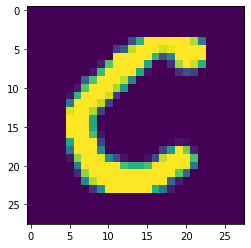

In [12]:
letter = rows[30000]
x = np.array([int(j) for j in letter[1:]])
x = x.reshape(28,28)

print(letter)
plt.imshow(x)

In [0]:
train_data = []
train_label = []

for letter in rows :
  if letter[0] == '0' or (letter[0] == '1') or (letter[0] == '2') or (letter[0] == '3'):
      x = np.array([int(j) for j in letter[1:]])
      x = x.reshape(28,28)
      train_data.append(x)
      train_label.append(int(letter[0]))
  else:
      break

In [14]:
print(len(train_label))

56081


In [0]:
import random

shuffle_order = list(range(56081))
random.shuffle(shuffle_order)

train_data = np.array(train_data)
train_label = np.array(train_label)

train_data = train_data[shuffle_order]
train_label = train_label[shuffle_order]

In [16]:
print(train_data.shape)
train_x = train_data[:50000]
train_y = train_label[:50000]

val_x = train_data[50000:53000]
val_y = train_label[50000:53000]

test_x = train_data[53000:]
test_y = train_label[53000:]

(56081, 28, 28)


In [0]:
BATCH_SIZE = 32
IMG_SIZE = 28
N_CLASSES = 4
LR = 0.001
N_EPOCHS = 50

In [0]:
# reshape lại dữ liệu cho đúng kích thước mà keras yêu cầu
train_x = train_x.reshape(-1,28,28,1)
val_x = val_x.reshape(-1,28,28,1)
test_x = test_x.reshape(-1,28,28,1)

In [50]:
model = Sequential()
model.add(Conv2D(32, (3, 3),activation='sigmoid', input_shape=(28,28,1)))


# Thêm Convolutional layer 
model.add(Conv2D(32, (3, 3), activation='sigmoid'))
# Thêm Max pooling layer 
model.add(MaxPooling2D(pool_size=(2,2)))
# Flatten layer chuyển từ tensor sang vector 
model.add(Flatten())
# Thêm Fully Connected layer với 128 nodes và dùng hàm relu
model.add(Dense(128, activation='relu'))
# Output layer với 10 node và dùng softmax function để chuyển sang xác suất.
model.add(Dense(10, activation='softmax'))
model.add(Dense(1, activation='softmax'))
# 6. Compile model, chỉ rõ hàm loss_function nào được sử dụng, phương thức # đùng để tối ưu hàm loss function. 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()



Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               589952    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                

In [51]:
print(train_label.shape)
print(train_x.shape)
print(val_x.shape)
print("Start training")

H = model.fit(train_x,train_y, validation_data=(val_x, val_y),batch_size=32, epochs=10, verbose=1)



(56081,)
(50000, 28, 28, 1)
(3000, 28, 28, 1)
Start training
Epoch 1/10
1563/1563 [==============================] - 90s 57ms/step - loss: 0.0000e+00 - accuracy: 0.1550 - val_loss: 0.0000e+00 - val_accuracy: 0.1497
Epoch 2/10
1563/1563 [==============================] - 89s 57ms/step - loss: 0.0000e+00 - accuracy: 0.1550 - val_loss: 0.0000e+00 - val_accuracy: 0.1497
Epoch 3/10
1563/1563 [==============================] - 90s 57ms/step - loss: 0.0000e+00 - accuracy: 0.1550 - val_loss: 0.0000e+00 - val_accuracy: 0.1497
Epoch 4/10
1563/1563 [==============================] - 89s 57ms/step - loss: 0.0000e+00 - accuracy: 0.1550 - val_loss: 0.0000e+00 - val_accuracy: 0.1497
Epoch 5/10
1563/1563 [==============================] - 89s 57ms/step - loss: 0.0000e+00 - accuracy: 0.1550 - val_loss: 0.0000e+00 - val_accuracy: 0.1497
Epoch 6/10
1563/1563 [==============================] - 89s 57ms/step - loss: 0.0000e+00 - accuracy: 0.1550 - val_loss: 0.0000e+00 - val_accuracy: 0.1497
Epoch 7/10
1563

In [54]:
score = model.evaluate(test_x,test_y,verbose = 0)
print(score)

[0.0, 0.15222330391407013]


In [0]:
#Xac định bài toán object detection

img = cv2.imread("./anhtracnghiem.jpg",0)
blur = cv2.GaussianBlur(img,(5,5),0)
thresh = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)

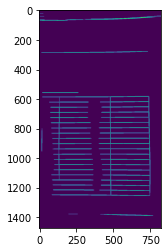

In [45]:
horizal = thresh
vertical = thresh

scale_height = 20 #Scale này để càng cao thì số dòng dọc xác định sẽ càng nhiều
scale_long = 15

long = int(img.shape[1]/scale_long)
height = int(img.shape[0]/scale_height)

horizalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (long, 1))
horizal = cv2.erode(horizal, horizalStructure, (-1, -1))
horizal = cv2.dilate(horizal, horizalStructure, (-1, -1))

verticalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (1, height))
vertical = cv2.erode(vertical, verticalStructure, (-1, -1))
vertical = cv2.dilate(vertical, verticalStructure, (-1, -1))

mask = vertical + horizal
plt.imshow(mask)



In [0]:
 contours, hierarchy = cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

max = -1
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    if cv2.contourArea(cnt) > max:
        x_max, y_max, w_max, h_max = x, y, w, h
        max = cv2.contourArea(cnt)

In [0]:
table = img[y_max:y_max+h_max, x_max:x_max+w_max]

In [0]:
cropped_thresh_img = []
cropped_origin_img = []
countours_img = []

NUM_ROWS = 19
START_ROW = 1
for i in range(START_ROW, NUM_ROWS):
    thresh1 = thresh[y_max + round(i*h_max/NUM_ROWS):y_max + round((i+1)*h_max/NUM_ROWS), x_max + round(w_max/6):x_max +round(w_max/2)]
    contours_thresh1, hierarchy_thresh1 = cv2.findContours(thresh1,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    origin1 = img[y_max + round(i*h_max/NUM_ROWS):y_max + round((i+1)*h_max/NUM_ROWS), x_max + round(w_max/6):x_max +round(w_max/2)]

    cropped_thresh_img.append(thresh1)
    cropped_origin_img.append(origin1)
    countours_img.append(contours_thresh1)

for i in range(START_ROW, NUM_ROWS):
    thresh1 = thresh[y_max + round(i*h_max/NUM_ROWS):y_max + round((i+1)*h_max/NUM_ROWS), x_max + round(2*w_max/3):x_max +round(w_max)]
    contours_thresh1, hierarchy_thresh1 = cv2.findContours(thresh1,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    origin1 = img[y_max + round(i*h_max/NUM_ROWS):y_max + round((i+1)*h_max/NUM_ROWS), x_max + round(2*w_max/3):x_max +round(w_max)]

    cropped_thresh_img.append(thresh1)
    cropped_origin_img.append(origin1)
    countours_img.append(contours_thresh1)
    

In [0]:
for i, countour_img in enumerate(countours_img):
    for cnt in countour_img:
        if cv2.contourArea(cnt) > 30:
             x,y,w,h = cv2.boundingRect(cnt)
             if x > cropped_origin_img[i].shape[1]*0.1 and x < cropped_origin_img[i].shape[1]*0.9:
                 answer = cropped_origin_img[i][y:y+h, x:x+w]
                 answer = cv2.threshold(answer, 160, 255, cv2.THRESH_BINARY_INV)[1]